In [1]:
pip install torch torchvision matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: networkx in c:\users\aschm\anaconda3\lib\site-packages (from torch) (2.6.3)



In [14]:
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

In [15]:
# Defining the data transformations including resizing, normalization, and tensor conversion
transform = transforms.Compose([
    transforms.Resize((64, 64)),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  
])

# Loading the dataset
dataset = datasets.ImageFolder(root='C:\\Users\\aschm\\Downloads\\STA380-master\\STA380-master\\data\\EuroSAT_RGB', transform=transform)

# Splitting the dataset into train and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Creating data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

When setting up a neural network to classify the satellite images as accurately as possible, the first course of action was to import the necessary library for running neural networks: PyTorch (torch). Alongside PyTorch, DataLoader and random_split were loaded in. DataLoader will be used to load in the satellite image data in batches and shuffling it around during the training of the neural network. The random_split function will be utilized to split the the dataset into a train and test split. Other things loaded in include datasets, transforms, and ToTensor. Datasets grants access to standard datasets, including the ImageFolder dataset loader, which will be useful in loading in the satellite images. Transforms contains image transformations like resizing and normalizing, and ToTensor converts images to tensors used by PyTorch.

After loading everything in, I needed to define the data transformaitons, such as resizing, normalizaiton, and tensor conversion. This was primarily done through the implementation of transforms.Compose(), which successfully chains
multiple image transformations together. Through this, I utilized transforms.Resize() to resize each satellite image to 64 X 64, in order to account for the variability in image size among the dataset. Transforms.ToTensor() then converted the images into tensors, which are the basic data strucutres representing images. Furthermore, the pixel values for each image were normalized to possess a mean of 0.5 and a standard deviation of 0.5. At this point, the satellite image data could be loaded via datasets.ImageFolder(), applying the necessary transformations in the process.
The data was subsequently split in to an 80/20 train test split, aided by the use of the random_split() function. Finally, the data loaders are created for both the train and the test sets, with the training set loader shuffling the images before each epoch to improve overall model generalization.

In [16]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, 11) 
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 64 * 16 * 16)  
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

Once the data loaders were created, I then had to define a convolutional neural network (CNN) for the satellite images. Importing torch.nn provides the modules necessary to construct the layers for neural networks, and importing torch.nn.functional provides functions for operations necessary when setting up a CNN. When establishing the CNN class, the init method initializes the layers of the network. Self.conv1 is a 2D convolutional layer which outputs 32 feature maps, and self.conv2 is another 2D convolutional layer which gathers the 32 feature maps in self.conv1 and outputs 64 feature maps. Self.fc1 is a connected linear layer which takes the flatenned feature maps, and self.fc2 is a fully connected layer with 11 output units. These 11 output units correspond to the 11 possible classes for the satellite images. The forward method outlines how the satellite images pass through the neural network, beginning by applying the first convolutional layer and max pooling. The second convolutional layer is then applied, in addition to max pooling. After performing these operations, the method flattens the output of the convolutional layers into a one-dimensional vector. Lastly, the method applies both the first and second fully convolutional layers, in order to make a final decision as to the satellite images' classes.

In [17]:
import torch.optim as optim

# Initializing the model, loss function, and optimizer
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        # Zeroing the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

Epoch 1, Loss: 0.9267934628769203
Epoch 2, Loss: 0.5418002350793945
Epoch 3, Loss: 0.41793650365538065
Epoch 4, Loss: 0.31527611306971975
Epoch 5, Loss: 0.23063944866811786
Epoch 6, Loss: 0.17795300209411868
Epoch 7, Loss: 0.13256006176824922
Epoch 8, Loss: 0.10691196110996383
Epoch 9, Loss: 0.08563570846665512
Epoch 10, Loss: 0.07482038914398463


After creating the CNN class, it was time to initialize and train the neural network. First off, the neural network was initialized by calling an instance of the CNN class, which was stored in a variable called model. nn.CrossEntropyLoss() was then utilized to calculate the difference between the labels of the predicted class and the actual class. The Adam optimizer was then used to adjust the parameters of the CNN in order to minimize its loss. I had the training loop for the model run for 10 epochs, iterating over the training set and loading smaller batches of satellite images and labels. In the for loop, the gradients for all of the CNN parameters were set to zero, in preparation for the backward pass. Forward propogation was then utilized in passing the satellite images through the model, collecting the predicted outputs. The criterion() function subsequently compared the predicted classes with the actual classes in order to determine the loss. Furthermore, backward propogation was used to calculate the gradients of the loss, and the model parameters were adjusted on the basis of the gradients. The last step in training the model was to track the total training loss for all of the images in the epoch. The average loss per epoch was then printed onto the screen, after every iteration of the training loop.

Test Accuracy: 0.8574


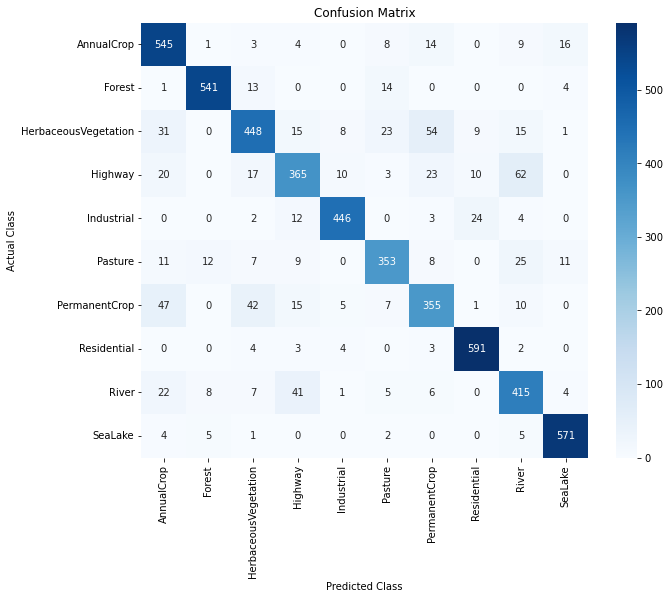

In [18]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Switching to evaluation mode
model.eval()

# Storing true labels (actual class) and predicted labels (predicted class)
true_labels = []
pred_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        true_labels.extend(labels.numpy())
        pred_labels.extend(preds.numpy())

# Calculating accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"Test Accuracy: {accuracy:.4f}")

# Generating confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plotting confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()

Once the neural network model was trained, it needed to be evaluated on the test set. Before doing this, though, I had to import a few libraries. The numpy library first needed to be loaded, in order to successfully be able to work with arrays. Both accuracy_score and confusion_matrix were then imported from sklearn.metrics, in order to caclulate the test-set accuracy of the neural network and generate the confusion matrix for the model. The matplotlib and seaborn libraries were imported in order to allow for the plotting and visualization of the confusion matrix. After importing the necessary libraries, the CNN model needed to be set to evaluation mode. Once this was accomplished, the actual and predicted class labels needed to be collected and stored. The first step in doing this was to create empty lists for both actual and predicted labels. Following this, a for loop was used to iterate through the satellite images in the test set. During each iteration, test set images are passed through the model, in order to generate predictions. The torch.max() function then selects the class with the greatest probability, based on the output from the model for every test set image. The predicted and actual class labels are then appended to the previously empty lists. When caculating the test-set accuracy of the model, the accuracy_score() function was used, with the actual class labels and predicted class labels as parameters. The resulting accuracy was printed onto the screen, which ended up being roughly 85.74%. The above confusion matrix was generated via the incorporation of the confusion_matrix() function, which also took the actual and predicted class labels as parameters. After all of these steps were completed, the confusion matrix was plotted, visualizing the counts of classifications which were incorrect and correct. The predicted class labels are on the x-axis, and the actual class labels are on the y-axis.

From the confusion matrix, several insights emerge. As suggested by the test-set accuracy, the model appears to be performing quite well when it comes to predicting the classes for the satellite images, as all of the diagonal values are significantly larger than the rest. The model seems to predict the best when it comes to the Residential (591 correct), SeaLake (571 correct), and Forest (541 correct) classes, although it generally excels all around. When considering the misclassifications, the model appears to have a bit of trouble distinguishing between crops and vegetation types for the images. This is particularly the case as it concerns PermanentCrop, AnnualCrop, and HerbaceousVegetation. For example, 47 instances of PermanentCrop were misclassified as AnnualCrop, suggesting possible difficulties of the model in differentiating between the two classes. It is also worhty to note that HerbaceousVegetation seems to be frequently misclassified as multiple other classes. This is especially the case when looking at AnnualCrop (31 misclassifications) and PermanentCrop (54 misclassifications), indicating that the CNN model struggles to completely distinguish these classes from one another. Perhaps the strangest revelation from the confusion matrix relates to a decent amount of Highway class images being misclassified as River (62 misclassifications). This might relate to the similar general shape between highways and rivers, since they can both be either windy or straight, depending upon the environment. More epochs and tuning of parameters might reduce this type of misclassification from occurring in the future.

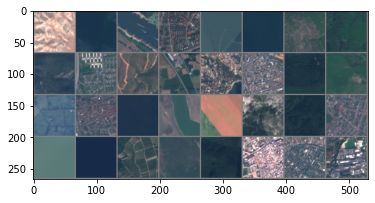

GroundTruth:  HerbaceousVegetation SeaLake River Residential
Predicted Class:  PermanentCrop SeaLake River Residential


In [19]:
import torchvision

# Gathering test images
dataiter = iter(test_loader)  
images, labels = next(dataiter)  

# Getting predictions
outputs = model(images)
_, preds = torch.max(outputs, 1)

# Displaying the images along with predicted classes
def imshow(img):
    img = img / 2 + 0.5  
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Displaying the images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{dataset.classes[labels[j]]}' for j in range(4)))
print('Predicted Class: ', ' '.join(f'{dataset.classes[preds[j]]}' for j in range(4)))

Above are some example images from the test set. The class labels following "GroundTruth" are the actual classes of the satellite images, while the class labels following "Predicted Class" are the predicted classes of the CNN model. As seen above, the model successfully predicted the classes of three out of the first four images. It was not able to determine the proper class label for the first image, however. Instead of the correct class "HerbaceousVegetation", the model's predicted class for the image was "PermanentCrop". Clearly, it was not able to identify all of the unique characteristics which make up the HerbaceousVegetation class. Increasing the number of epochs could lead to better performance, and it is something to definitely consider when possibly improving the model in the future. All in all, this can be forgiven, as the model's overall test-set accuracy was still about 85.74%, which is a sufficient level given the number of epochs.